<a href="https://colab.research.google.com/github/badeakar/CS210-Restaurant-Review-Analysis/blob/main/CS210_TermProject_BadeAkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS210 - Term Project**
# **Restaurant Review and Data Analysis**
**Bade Akar**


In a dynamic world of culinary exploration, dining experiences serve as a rich tapestry of memories, weaving together tastes, ambiance, and personal preferences. This project aims to understand my personal experiences within a dataset curated over two years. The dataset, encapsulated in the file "restaurant.xlsx," acts as a repository of personal encounters.

### **Dataset Overview:**

The columns within the dataset serve as the key dimensions through which each restaurant is evaluated:

**Restaurant**

**Location**

**Cuisine:** While most of them are known cuisines or types of food, one listed cuisine is "Restaurant". The "Restaurant" category includes places that don't specialize in a specific cuisine, offering a wide variety of dishes that do not fall into any other categories specifically.

**Accessibility:** A measure of the ease or difficulty in reaching the restaurant, with 1 for significant challenges and 5 indicating effortless accessibility.

**Cleanlines:** An assessment of the establishment's cleanliness, where 1 implies a lower standard and 5 signifies exceptional hygiene.

**Food:** A personal rating reflecting the enjoyment and satisfaction derived from the culinary offerings.

**Price:** A subjective evaluation of the cost-effectiveness, with 1 suggesting a more economical experience and 5 representing a higher price point.

**Overall:** A score that takes into account everything about the dining encounter, offering a reflection of the overall satisfaction.

**Avg Score:** The mean of all manually assigned scores.

# **1. Data Exploration**

### **1.1 Descriptive statistics**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

In [107]:
#read the Excel file
def read_excel_file(file_path):
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

data = read_excel_file('restaurant.xlsx')

if data is not None:
    # Display the first few rows of the Data
    print(data.head())
else:
    print("The file could not be read. Please check the file path and ensure the file exists.")

       Restaurant  Location                   Cuisine  Accesibility  \
0  Adana ocakbaşı     Şişli                     Kebab             4   
1            Afil     Şişli                     Kebab             4   
2           Akali   Kadıköy                 Fast Food             4   
3            alaf  Beşiktaş  Traditional Turkish Food             3   
4           Alaf   Ataşehir                     Kebab             3   

   Cleanliness  Food  Price  Overall  Avg Score  
0            3     4      4        4        3.8  
1            5     5      3        4        4.2  
2            4     5      5        4        4.4  
3            5     5      5        5        4.6  
4            3     4      5        4        3.8  


In [108]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    129 non-null    object 
 1   Location      129 non-null    object 
 2   Cuisine       129 non-null    object 
 3   Accesibility  129 non-null    int64  
 4   Cleanliness   129 non-null    int64  
 5   Food          129 non-null    int64  
 6   Price         129 non-null    int64  
 7   Overall       129 non-null    int64  
 8   Avg Score     129 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 9.2+ KB
None


In [109]:
print(data.describe())

       Accesibility  Cleanliness        Food       Price     Overall  \
count    129.000000   129.000000  129.000000  129.000000  129.000000   
mean       4.100775     4.341085    4.356589    3.643411    4.248062   
std        0.891321     0.765426    0.622476    0.882100    0.586715   
min        1.000000     2.000000    3.000000    1.000000    3.000000   
25%        4.000000     4.000000    4.000000    3.000000    4.000000   
50%        4.000000     4.000000    4.000000    4.000000    4.000000   
75%        5.000000     5.000000    5.000000    4.000000    5.000000   
max        5.000000     5.000000    5.000000    5.000000    5.000000   

        Avg Score  
count  129.000000  
mean     4.137984  
std      0.406816  
min      2.600000  
25%      3.800000  
50%      4.200000  
75%      4.400000  
max      4.800000  


The descriptive statistics reveal that on average, restaurants have higher scores for accessibility and cleanliness, while price has a wider spread (standard deviation) indicating more variability in pricing scores across different restaurants.

###**1.2 Histograms for each score column**


Helps visualize the distribution of scores, showing how often each score range occurs, which can be useful to understand the variability and tendency of the scoring.

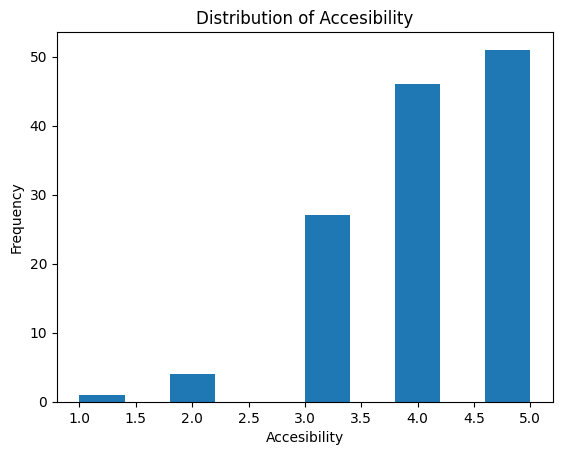

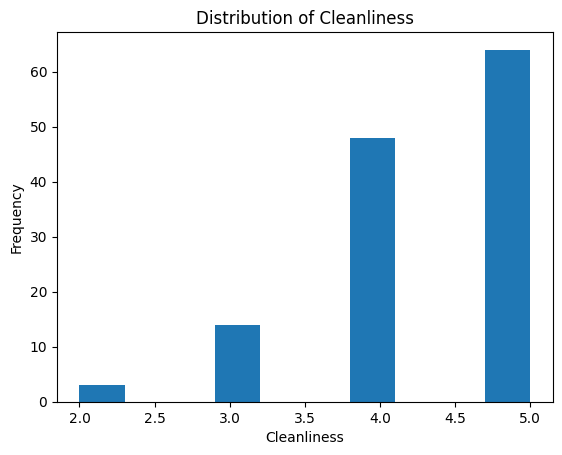

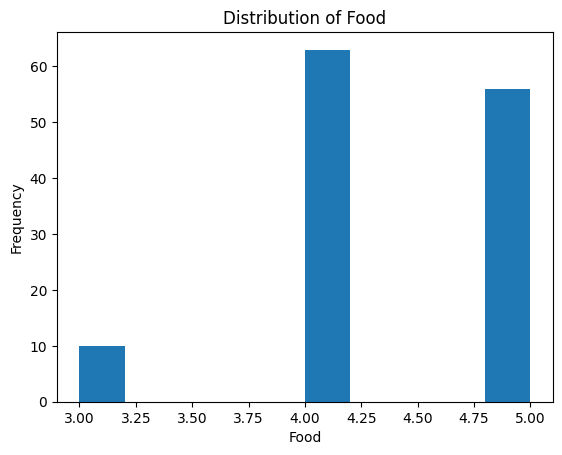

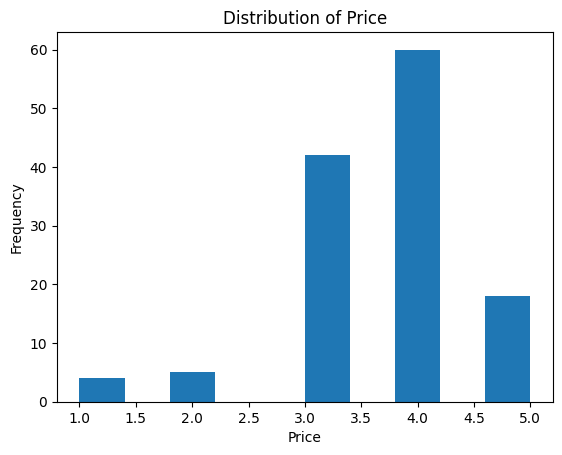

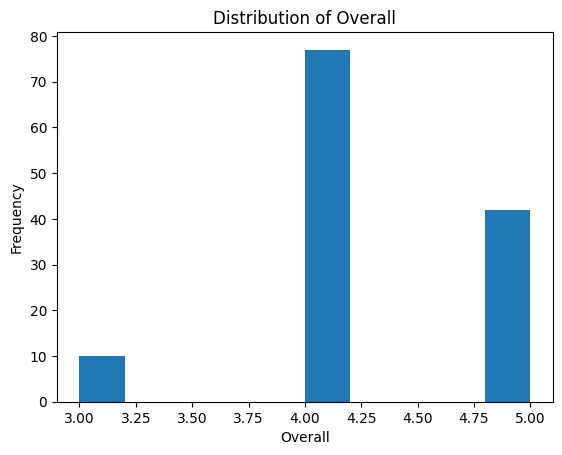

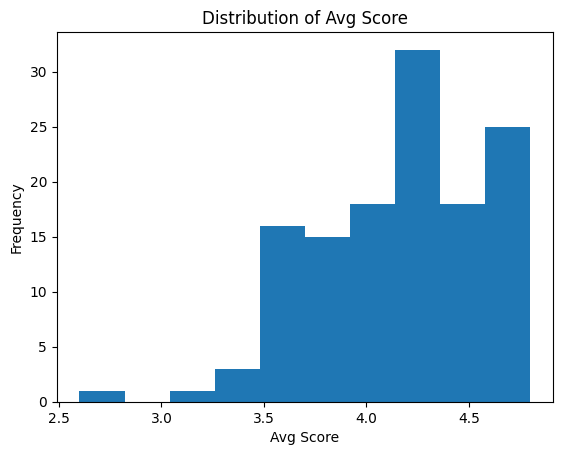

In [111]:
for column in ['Accesibility', 'Cleanliness', 'Food', 'Price', 'Overall', 'Avg Score']:
    plt.hist(data[column].dropna(), bins=10)  # Drop NA values for the histogram
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### **1.3 Location impact**

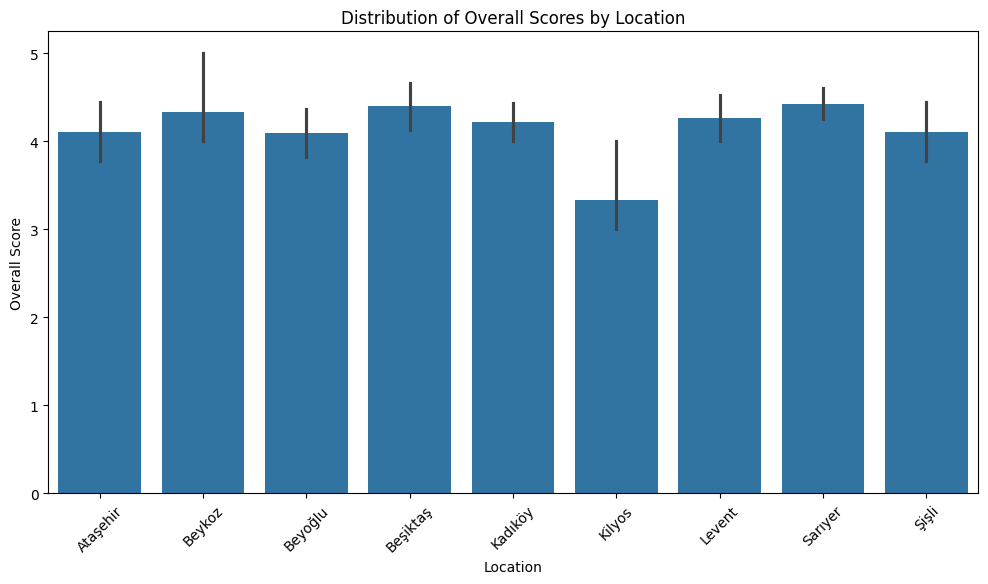

In [113]:
# Sort the data frame based on the 'Location' column
data.sort_values('Location', inplace=True)

# Bar plots for each score category by location
score_columns = ['Overall']

for score_column in score_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Location', y=score_column, data=data)
    plt.title(f'Distribution of {score_column} Scores by Location')
    plt.xlabel('Location')
    plt.ylabel(f'{score_column} Score')
    plt.xticks(rotation=45)
    plt.show()



In [114]:
from scipy.stats import f_oneway

# Example: ANOVA for Overall scores by location
locations = data['Location'].unique()
location_groups = [data[data['Location'] == location]['Overall'] for location in locations]

# Perform ANOVA
f_statistic, p_value = f_oneway(*location_groups)
print(f'ANOVA for Overall Scores: F-statistic = {f_statistic}, p-value = {p_value}')


ANOVA for Overall Scores: F-statistic = 1.6773943785224812, p-value = 0.1107013238403493


- The F-statistic from the ANOVA test is approximately 1.68, suggesting some degree of variance between group means.
- With a p-value of approximately 0.111, the test does not provide strong evidence to suggest significant differences in 'Overall' scores among the different locations.
- Since the p-value exceeds the common significance threshold of 0.05, we fail to reject the null hypothesis, indicating that any observed differences in 'Overall' scores could be due to chance.
- The conclusion from this ANOVA test is that there is no statistically significant difference in scores across the various locations in the dataset.

### **1.4 Correlation matrix and heatmap**


This code calculates the correlation matrix of the numerical columns in the DataFrame, which measures the linear relationship between pairs of columns. The heatmap visually represents this correlation matrix, making it easier to identify highly correlated variables.

<ipython-input-115-c7e291b4175d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


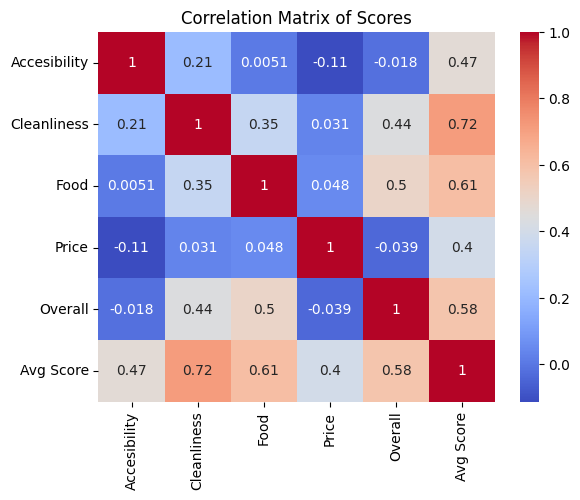

In [115]:
import seaborn as sns
# Calculate correlation matrix
correlation_matrix = data.corr()
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Scores')
plt.show()






*   There is a strong correlation between 'Food' scores and 'Overall' scores, indicating a significant impact of food quality on overall satisfaction.
*   'Avg Score' also shows strong correlations with 'Cleanliness' and 'Food', suggesting these aspects are key contributors to a restaurant's average rating.



### **1.5 Cuisine counts**


The block calculates the frequency of each cuisine type. It also generates a bar chart to visualize the number of restaurants associated with each cuisine type.

Kebab                       26
Italian Cuisine             22
Restaurant                  22
Fish Restaurant             18
Breakfast/ Cafe             11
Far Eastern Cuisine          8
Traditional Turkish Food     7
Steakhouse                   4
Fine Dining                  3
Fast Food                    3
Cocktail Bar                 3
French Cuisine               1
Mexican Food                 1
Name: Cuisine, dtype: int64


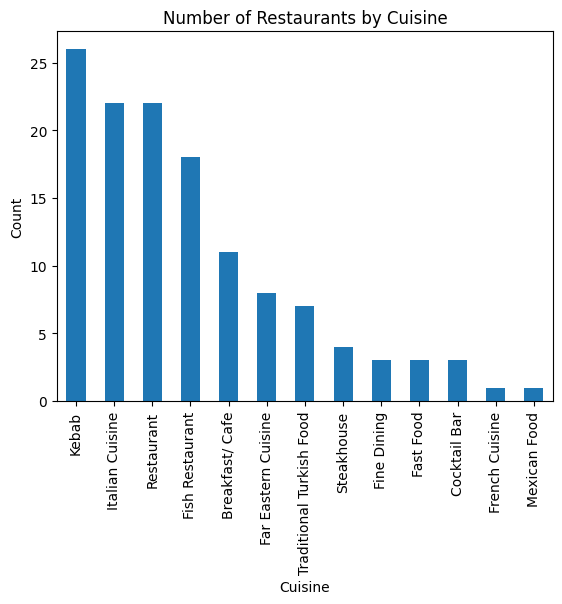

In [116]:
cuisine_counts = data['Cuisine'].value_counts()
print(cuisine_counts)
#visualize this as a bar chart:
cuisine_counts.plot(kind='bar')
plt.title('Number of Restaurants by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()


The block specifically focuses on the top 5 cuisines. It prints the counts and visualizes them in a bar chart, showing which cuisines are most prevalent in the dataset.

Kebab              26
Italian Cuisine    22
Restaurant         22
Fish Restaurant    18
Breakfast/ Cafe    11
Name: Cuisine, dtype: int64


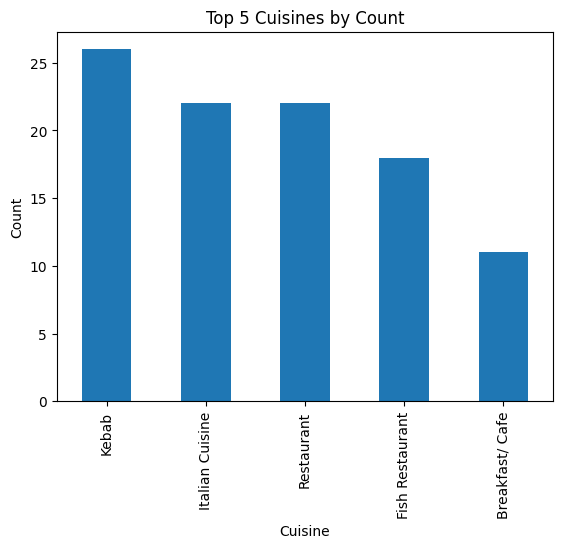

In [117]:
#show the top 5 cuisines with their counts
top_cuisines = data['Cuisine'].value_counts().head(5)
print(top_cuisines)

#visualize the top 5 cuisines with their counts in a bar chart
import matplotlib.pyplot as plt
top_cuisines.plot(kind='bar')
plt.title('Top 5 Cuisines by Count')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()


* Kebab and Italian cuisines are among the most common, suggesting a preference for these types.
* The 'Restaurant' category is also prevalent, indicating varied tastes.

### **1.6 Top restaurants**

This code sorts the DataFrame based on the 'Avg Score' column in descending order to find the top 5 restaurants.



In [118]:
# Code to show the top 5 restaurants regarding their overall scores
top_restaurants_by_score = data.sort_values(by='Avg Score', ascending=False).head(5)
print(top_restaurants_by_score[['Restaurant', 'Avg Score', 'Cuisine', 'Accesibility', 'Cleanliness', 'Food', 'Price', 'Overall']])

                       Restaurant  Avg Score          Cuisine  Accesibility  \
82                      Papermoon        4.8  Italian Cuisine             4   
23  Çanak Katmer Kebap Restaurant        4.8            Kebab             5   
63                       La Plage        4.8       Restaurant             5   
5                      Angel Blue        4.8  Fish Restaurant             5   
77                           Noir        4.8       Restaurant             5   

    Cleanliness  Food  Price  Overall  
82            5     5      5        5  
23            5     5      4        5  
63            5     5      4        5  
5             5     5      4        5  
77            5     5      4        5  


* Restaurants have high ratings across various categories, showing overall customer satisfaction.
* The list includes a mix of different cuisines, indicating quality is not confined to one type.

The dataset is grouped by 'Cuisine', and for each group, the top 3 restaurants with the highest 'Avg Score' are identified.

In [119]:
# Code to print the top 3 restaurants with the highest overall score from each cuisine
# Group by 'cuisine' and then apply a lambda function to sort by 'overall score' and get the top 3 for each group
top_restaurants_by_cuisine = data.groupby('Cuisine').apply(
    lambda x: x.sort_values(by='Avg Score', ascending=False).head(1)
)
# Since the index will be duplicated, we'll want to reset it
top_restaurants_by_cuisine = top_restaurants_by_cuisine.reset_index(drop=True)
# Select only the relevant columns for display
top_restaurants_by_cuisine = top_restaurants_by_cuisine[['Cuisine', 'Restaurant', 'Avg Score']]
print(top_restaurants_by_cuisine)

                     Cuisine                     Restaurant  Avg Score
0            Breakfast/ Cafe                  Emirgan sütiş        4.8
1               Cocktail Bar              Townhouse Suadiye        4.4
2        Far Eastern Cuisine                           Zuma        4.4
3                  Fast Food                          Akali        4.4
4                Fine Dining                           Zaaf        4.8
5            Fish Restaurant                          Kipos        4.8
6             French Cuisine                       Arkestra        4.2
7            Italian Cuisine                      Papermoon        4.8
8                      Kebab  Çanak Katmer Kebap Restaurant        4.8
9               Mexican Food                       Ranchero        3.8
10                Restaurant                           Noir        4.8
11                Steakhouse                  polonez grill        4.4
12  Traditional Turkish Food                          Seraf        4.8


* This diversity in top-rated cuisines could be useful for making dining recommendations.

### **1.7 Average Scores**



This block calculates the average 'Avg Score' for each cuisine and sorts the results in descending order.


In [120]:
# Code to calculate the average overall score for each cuisine
# This code assumes 'cuisine' and 'overall score' are the correct column names in your dataset.

avg_score_by_cuisine = data.groupby('Cuisine')['Avg Score'].mean().sort_values(ascending=False)
print(avg_score_by_cuisine)

print()

top_avg_score_cuisines = avg_score_by_cuisine.sort_values(ascending=False).head(3)

print(top_avg_score_cuisines)


Cuisine
Traditional Turkish Food    4.257143
Restaurant                  4.209091
Cocktail Bar                4.200000
Fast Food                   4.200000
Fine Dining                 4.200000
French Cuisine              4.200000
Italian Cuisine             4.181818
Fish Restaurant             4.166667
Kebab                       4.153846
Steakhouse                  4.150000
Breakfast/ Cafe             3.927273
Far Eastern Cuisine         3.850000
Mexican Food                3.800000
Name: Avg Score, dtype: float64

Cuisine
Traditional Turkish Food    4.257143
Restaurant                  4.209091
Cocktail Bar                4.200000
Name: Avg Score, dtype: float64


* Traditional Turkish Food, general 'Restaurant', and Cocktail Bars score the highest on average.
* These high averages may highlight these cuisines' quality or the personal preferences.

The code computes the mean scores for all columns grouped by 'Cuisine'. It then creates a stacked bar chart comparing these average scores across different cuisines, providing a visual comparison of how each cuisine performs on average.



<ipython-input-121-7602a5665fb0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_scores_by_cuisine = data.groupby('Cuisine').mean()


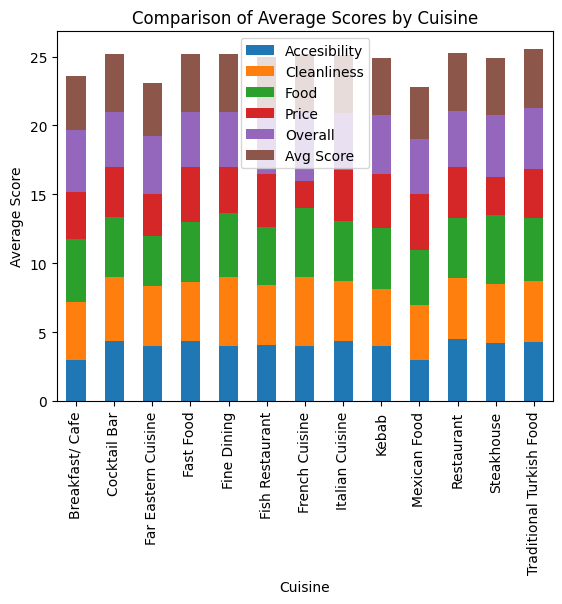

In [121]:
# Calculate average scores for each cuisine
avg_scores_by_cuisine = data.groupby('Cuisine').mean()

# Plot comparison of average scores
avg_scores_by_cuisine.plot(kind='bar', stacked=True)
plt.title('Comparison of Average Scores by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Score')
plt.show()


* The analysis provides a straightforward way to compare cuisines and understand which factors most affect average scores.

# **2. Machine Learning Models**

### **2.1 Linear Regression Model**


This code sets up a linear regression model using scikit-learn. It reads the dataset, cleans it by dropping missing values, selects features and the target variable, splits the data into training and testing sets, trains the model on the training data, and makes predictions on the test set. The model's performance is evaluated using Mean Squared Error (MSE), and a scatter plot is used to compare actual versus predicted overall scores.

Mean Squared Error: 0.24645579356631936


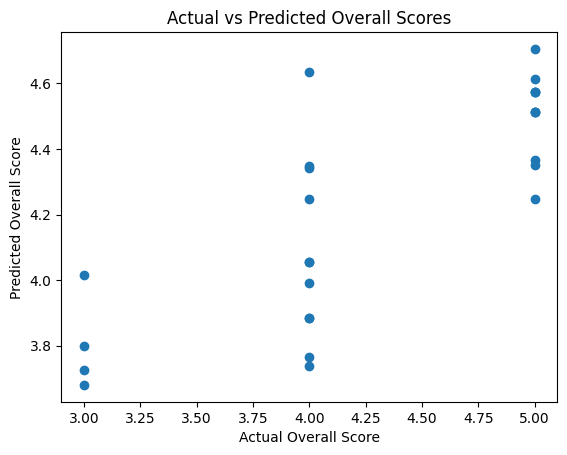

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Select features (independent variables) and target variable
X = data[['Accesibility', 'Cleanliness', 'Food', 'Price']]
y = data['Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Overall Score')
plt.ylabel('Predicted Overall Score')
plt.title('Actual vs Predicted Overall Scores')
plt.show()

* The Linear Regression model fits well for predicting overall restaurant scores.
* A low mean squared error (MSE) indicates accurate predictions close to the actual scores.
* The model is particularly useful for forecasting satisfaction based on accessibility, cleanliness, food, and price scores.

### **2.2 Decision Tree Model**



This block involves the creation and training of a Decision Tree Regression model. After training the model on the training set, it makes predictions on the test set. The model's performance is evaluated using Mean Squared Error (MSE). Additionally, a visual representation of the decision tree is provided, showing how different features contribute to predicting the overall scores.

Mean Squared Error: 0.24555206698063842


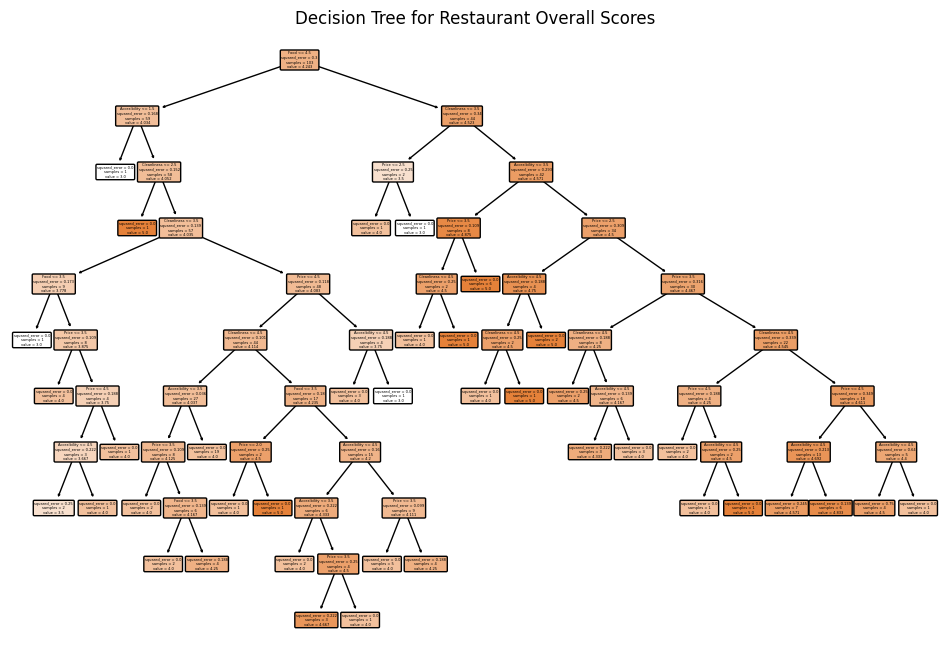

In [123]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree for Restaurant Overall Scores')
plt.show()

* The Decision Tree Regression model has a higher MSE than Linear Regression, suggesting potential overfitting or sensitivity to data variability.
* Despite the higher MSE, it offers a detailed view of feature interactions and their impact on overall scores.
* It captures complex, non-linear relationships that may not be apparent in simpler models.

### **2.3 Random Forest Classifier**



This code converts overall scores into categorical classes (like low, medium, high) and then applies a RandomForestClassifier. The dataset is split into training and testing sets, and the model is trained and makes predictions. Model performance is assessed through accuracy, and a confusion matrix and classification report are provided. The confusion matrix is visualized using a heatmap, offering insights into the model's classification accuracy for each class.

Accuracy: 0.85
Confusion Matrix:
[[ 4  1]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.80      0.67         5
      Medium       0.95      0.86      0.90        21

    accuracy                           0.85        26
   macro avg       0.76      0.83      0.78        26
weighted avg       0.88      0.85      0.86        26



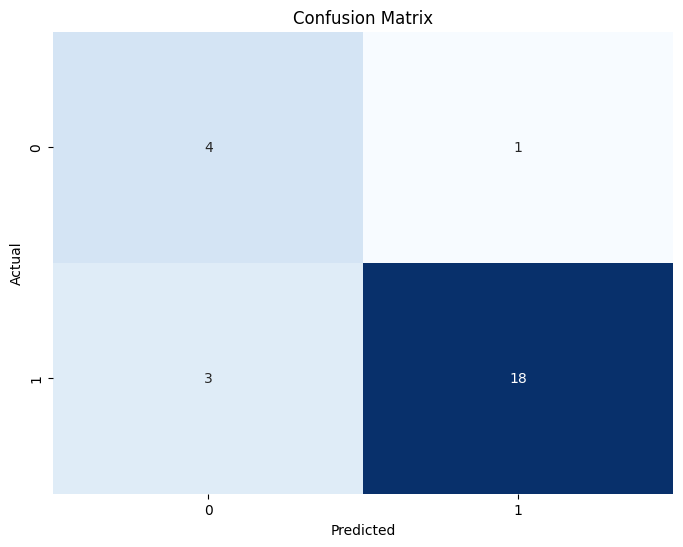

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Convert overall scores to classes (e.g., low, medium, high)
score_bins = [0, 2.5, 4, 5]
score_labels = ['Low', 'Medium', 'High']
data['Overall_Class'] = pd.cut(data['Overall'], bins=score_bins, labels=score_labels)

# Select features (independent variables) and target variable
X = data[['Accesibility', 'Cleanliness', 'Food', 'Price']]
y = data['Overall_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* The Random Forest Classifier is highly accurate in classifying restaurants into low, medium, and high satisfaction categories.
* The model is especially proficient at identifying restaurants of medium satisfaction level.
* It shows less effectiveness for high satisfaction levels, which could be due to sample size limitations or greater score variability.


After training the RandomForestClassifier, this code block calculates and visualizes the importance of each feature used in the model. It creates a bar chart displaying the importance of features like 'Accesibility', 'Cleanliness', 'Food', and 'Price', helping to understand which factors are most influential in predicting the overall class of a restaurant.

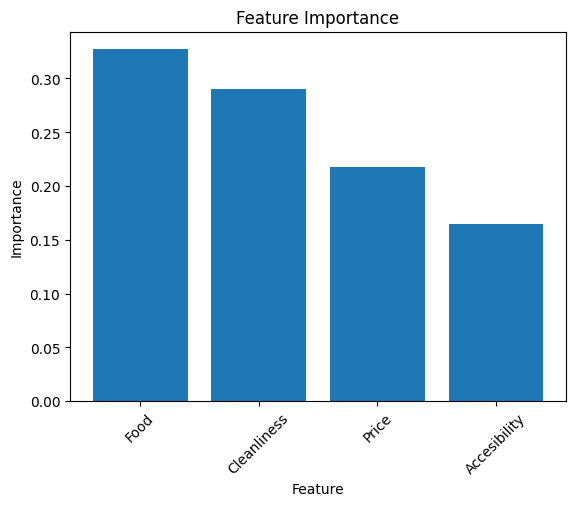

In [ ]:
# Calculate feature importance for RandomForestClassifier
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

* 'Food' and 'Cleanliness' emerge as the most influential factors in predicting restaurant ratings.
* 'Price' and 'Accessibility' are less critical but still have a notable impact on the model's predictions.
* The importance of these features aligns with insights from exploratory data analysis, confirming their significant role in dining satisfaction.

# **3. Conclusions**



***Key insights from the project***

- Food quality and cleanliness are the most influential factors in overall satisfaction.
- Price and accessibility, while important, have a lesser impact on the final ratings.
- A diverse range of cuisines has been explored, with certain types frequently visited.

***Limitations and Future Work***

- The dataset is limited to personal experiences and may not generalize to a wider audience.
- The score range (1-5) causes the average scores to be same for some cases so a wider score range (1-10) or (1-100) could be more effective in determining which really is better.
- Some cuisine types have fewer reviews, which may skew the analysis.
- Future work could involve collecting more data, including other factors like service quality, and implementing more complex models.


The analysis of the restaurant reviews highlights broad culinary interests, especially in Kebab and Italian cuisines, and highlights food quality as the key determinant of your dining satisfaction. High ratings across diverse cuisines reveal that excellence is not restricted to any single type or price point of dining. Machine learning models, particularly linear regression, effectively predict your overall satisfaction, suggesting a consistent and predictable pattern in your preferences. The Random Forest model confirms food quality and cleanliness as top influences on your ratings. In summary, these findings and predictive models could serve as a personalized guide to future dining experiences, reflecting taste and emphasizing the importance of food quality.